# RRN, LSTM & GRU Model

- Newyork Taxi Dataset

In [ ]:
'''The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, 
pickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup 
and dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether 
the trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks 
like predicting trip duration or analyzing taxi ride patterns.'''

'The taxi dataset consists of records containing information about taxi trips, such as vendor IDs, \npickup and dropoff datetimes, passenger counts, and geographic coordinates (longitude and latitude) for both pickup \nand dropoff locations. Additionally, the dataset includes a "store_and_fwd_flag" indicating whether \nthe trip data was stored in the vehicle before forwarding. This dataset is typically used for tasks \nlike predicting trip duration or analyzing taxi ride patterns.'

### Step 1: Importing Libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error

### Step 2: Data Preparation

In [18]:
df = pd.read_csv("ny_taxi_data.csv")

In [19]:
# Assuming you want to predict the 'passenger_count'

data = df["passenger_count"].values

In [20]:
data.reshape(-1, 1)

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

### Step 3: Data Preprocessing

In [21]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1))

# sequence_length = 5  # Adjust this as needed
# sequences = []
# targets = []

# for i in range(len(data) - sequence_length):
#     sequences.append(data[i:i+sequence_length])
#     targets.append(data[i+sequence_length])

# sequences = np.array(sequences)
# targets = np.array(targets)

In [22]:
data

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [23]:
sequence_length = 5  # Adjust this as needed
sequences = []
targets = []

for i in range(len(data) - sequence_length):
    sequences.append(data[i:i+sequence_length])
    targets.append(data[i+sequence_length])

sequences = np.array(sequences)
targets = np.array(targets)

In [24]:
len(data)

16100

In [25]:
sequences.shape

(16095, 5, 1)

In [26]:
targets.shape

(16095, 1)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.4, random_state=24)

### Step 4: Build and Train RNN Model

In [30]:
model_rnn = keras.Sequential(name="RNN")
model_rnn.add(keras.layers.SimpleRNN(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_rnn.add(keras.layers.Dense(1))

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model_rnn.compile(optimizer='adam', loss='mean_squared_error')

In [32]:
model_rnn.summary()

Model: "RNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, 100)            │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,301 (40.24 KB)

 Trainable params: 10,301 (40.24 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model_rnn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0687
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0695
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0653
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0679
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0652
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0649
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0668
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0713
Epoch 9/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0668
Epoch 10/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0681
Epoch 11/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0657
Epoch 12/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0687
Epoch 13/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0647
Epoch 14/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0680
Epoch 15/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1

### Step 5: Build and Train LSTM Model

In [35]:
model_lstm = keras.Sequential(name="LSTM")
model_lstm.add(keras.layers.LSTM(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_lstm.add(keras.layers.Dense(1))

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0746
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0695
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0705
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0690
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0689
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0702
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0735
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0721
Epoch 9/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0729
Epoch 10/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0704
Epoch 11/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0718
Epoch 12/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0703
Epoch 13/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0738
Epoch 14/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0703
Epoch 15/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1

In [38]:
model_lstm.summary()

Model: "LSTM"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,705 (479.32 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 81,804 (319.55 KB)

### Step 6: Build and Train GRU Model

In [39]:
model_gru = keras.Sequential(name="GRU")
model_gru.add(keras.layers.GRU(100, activation='relu', input_shape=(X_train.shape[1], 1)))
model_gru.add(keras.layers.Dense(1))
model_gru.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\milan\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
model_gru.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0729
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0706
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0710
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0699
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0673
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0708
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0707
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0701
Epoch 9/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0708
Epoch 10/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0705
Epoch 11/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0699
Epoch 12/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0703
Epoch 13/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0700
Epoch 14/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0723
Epoch 15/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1

In [42]:
model_gru.summary()

Model: "GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100)            │        30,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,005 (363.30 KB)

 Trainable params: 31,001 (121.10 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,004 (242.21 KB)

### Step 7: Evaluate the models

In [44]:
X_test.shape

(6438, 5, 1)

In [60]:
def evaluate_model(model, X_test, y_test):
    X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_pred = model.predict(X_test_reshaped)
    y_pred = scaler.inverse_transform(y_pred).flatten()
    y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
    mse = mean_squared_error(y_test, y_pred)
    return mse

mse_rnn = evaluate_model(model_rnn, X_test, y_test)
mse_lstm = evaluate_model(model_lstm, X_test, y_test)
mse_gru = evaluate_model(model_gru, X_test, y_test)

print(f"RNN Mean Squared Error: {mse_rnn}")
print(f"LSTM Mean Squared Error: {mse_lstm}")
print(f"GRU Mean Squared Error: {mse_gru}")

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
RNN Mean Squared Error: 101.91518724865769
LSTM Mean Squared Error: 102.25691629514243
GRU Mean Squared Error: 101.85803937134128


In [51]:
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
X_test_reshaped.shape

(6438, 5, 1)

In [56]:
y_pred = model_gru.predict(X_test_reshaped)
y_pred.shape

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(6438, 1)

In [57]:
y_pred = scaler.inverse_transform(y_pred).flatten()
y_pred.shape

(6438,)

In [58]:
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()
y_test.shape

(6438,)

### Step 8: Visualization

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


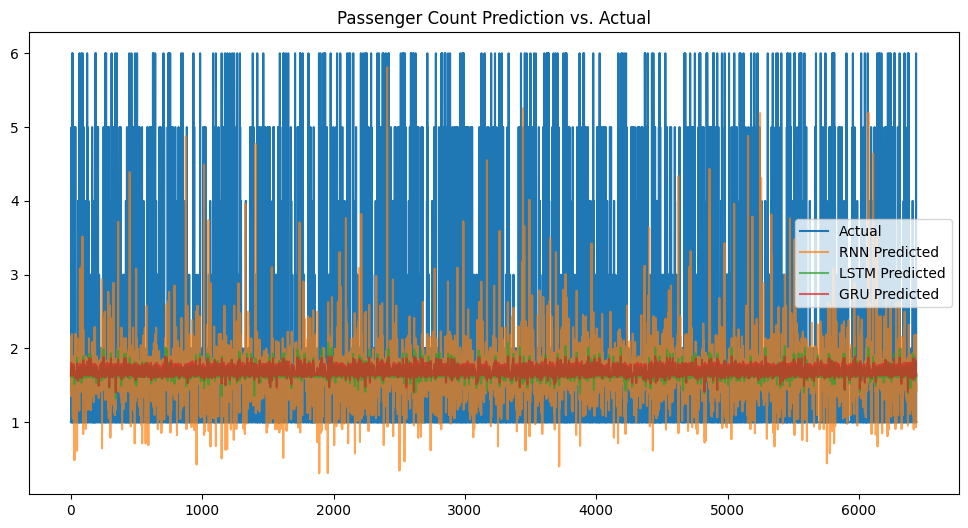

In [61]:
y_pred_rnn = model_rnn.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_rnn = scaler.inverse_transform(y_pred_rnn).flatten()

y_pred_lstm = model_lstm.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_lstm = scaler.inverse_transform(y_pred_lstm).flatten()

y_pred_gru = model_gru.predict(X_test.reshape(X_test.shape[0], X_test.shape[1], 1))
y_pred_gru = scaler.inverse_transform(y_pred_gru).flatten()

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_rnn, label='RNN Predicted', alpha=0.7)
plt.plot(y_pred_lstm, label='LSTM Predicted', alpha=0.7)
plt.plot(y_pred_gru, label='GRU Predicted', alpha=0.7)
plt.legend()
plt.title('Passenger Count Prediction vs. Actual')
plt.show()